In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
df = pd.read_csv('input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Skup podataka sastoji se od transakcija kreditnim karticama Europskih građana u rujnu 2013. godine. Sve transakcije u skupu podataka napravljene su unutar dva dana.

In [4]:
(df.isnull().sum() > 0).sum()

0

U skupu podataka nema nedostajućih podataka, tako da se ne treba baviti tehnikama nadopunjavanja takvih podataka.

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Skup podataka koji se koristi sastoji se od 30 brojčanih varijabli. Kako bi se zaštitila privatnost korisnika kreditnih kartica, originalne značajke nisu dostupne u skupu podataka. Umjesto toga, 28 značajki dobiveno je pomoću analize glavnih komponenti (PCA). Značajke dobivene PCA-om su označene kao V1, V2, V3, ..., V28, dok su dvije značajke koje nisu transformirane PCA-om 'Time' i 'Amount'. Značajka 'Time' predstavlja vrijeme proteklo između svake transakcije i prve transakcije u skupu podataka, dok značajka 'Amount' predstavlja iznos koji je terećen s kartice. Konačno, binarna ciljna značajka 'Class' označava transakcije koje su prijevare (1) i transakcije koje nisu prijevare (0).

Broj transakcija: 284807
Broj transackija koje nisu lažne: 284315
Broj lažnih transakcija: 492

Udio transakcija:
    99.827 % transakcija koje nisu lažne
    0.173 % lažnih transakcija


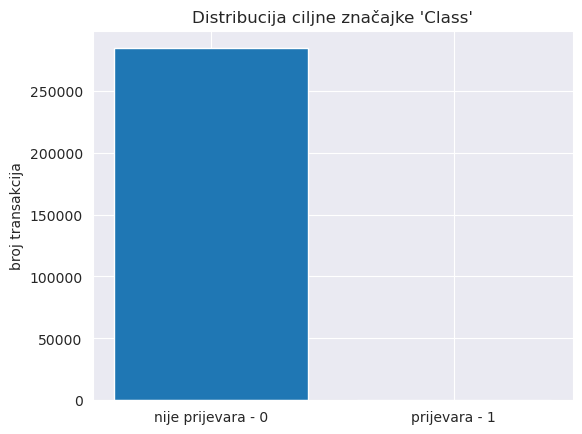

In [6]:
n_samples = len(df)
n_fraud_samples = df['Class'].sum()
n_non_fraud_samples = n_samples - n_fraud_samples
fraud_ratio = n_fraud_samples/n_samples
non_fraud_ratio = (n_samples-n_fraud_samples)/n_samples

print(f'Broj transakcija: {n_samples}')
print(f'Broj transackija koje nisu lažne: {n_non_fraud_samples}')
print(f'Broj lažnih transakcija: {n_fraud_samples}')
print(f'\nUdio transakcija:')
print(f'    {non_fraud_ratio * 100:.3f} % transakcija koje nisu lažne')
print(f'    {fraud_ratio * 100:.3f} % lažnih transakcija')

plt.bar(['nije prijevara - 0', 'prijevara - 1'], [n_non_fraud_samples, n_fraud_samples])
plt.title("Distribucija ciljne značajke 'Class'")
plt.ylabel('broj transakcija')
plt.subplots_adjust(left=0.15)
plt.savefig('distribucija_ciljne_znacajke_Class.png')
plt.show()

### Distribucija značajki

In [7]:
def plot_distribution(df, feature_name, split_by_class=False, ax=None):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    if split_by_class:
        sns.kdeplot(df[df['Class'] == 0][feature_name], fill=True, color='blue', ax=ax)
        sns.kdeplot(df[df['Class'] == 1][feature_name], fill=True, color='red', ax=ax)
        ax.legend(['Nije prijevara', 'Prijevara'])
    else:
        sns.kdeplot(df[feature_name], fill=True, color='green', ax=ax)
    ax.set_xlabel(feature_name)
    ax.set_ylabel('gustoća')
    ax.set_title(f"distribucija '{feature_name}'")
    ax.set_xlim([df[feature_name].min(), df[feature_name].max()])
    plt.savefig(f'distribucija_znacajke_{feature_name}{"_split_by_class" if split_by_class else ""}.png')
    if ax == None: plt.show()

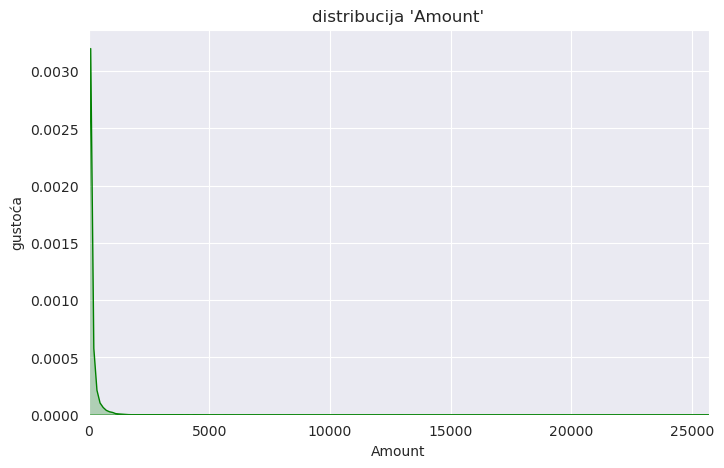

In [8]:
plot_distribution(df, 'Amount', split_by_class=False)

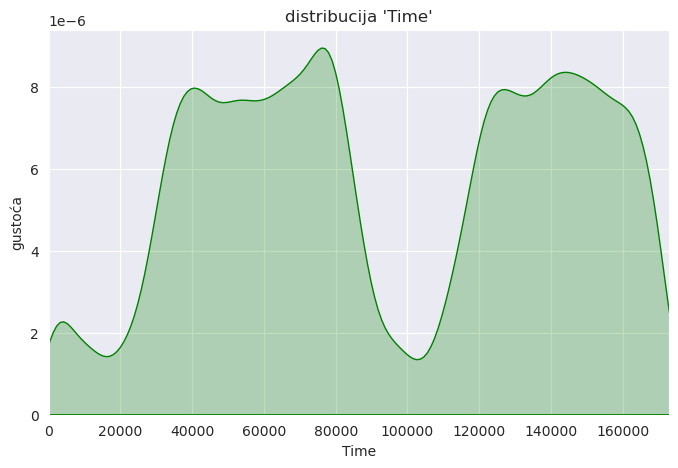

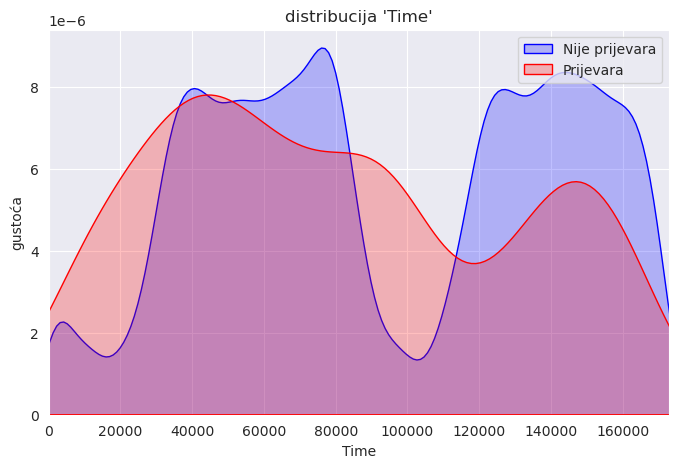

In [9]:
plot_distribution(df, 'Time', split_by_class=False)
plot_distribution(df, 'Time', split_by_class=True)

#### Skaliranje značajki

In [10]:
scaler = RobustScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [11]:
# postaviti 'Class' kao zadnji stupac
df = df[[col for col in df.columns if col != 'Class'] + ['Class']]

Značajke ćemo skalirati kako bi imale sličnu skalu podataka. To može pomoći performansama algoritama strojnog učenja, kao i smanjiti utjecaj stršećih vrijednosti.

Podaci V1-V28 su unaprijed skalirani, dok ćemo retke 'Amount' i 'Time' skalirati. Za skaliranje koristimo RobustScaler transformaciju iz paketa Sklearn. Novi retci su naziva 'Amount_scaled' i 'Time_scaled'. RobustScaler skalira podatke koristeći interkvartalni raspon IQR koji se dobiva kao razlika 75-tog i 25-tog percentila podataka. Medijan se oduzima od svih podataka i rezultat se dijeli sa izračunatim interkvartalnim rasponom. Podaci će imati medijan 0 i raspršenje slično kao originalni podaci. Ova metoda je dobra jer je robusna na stršeće vrijednosti.

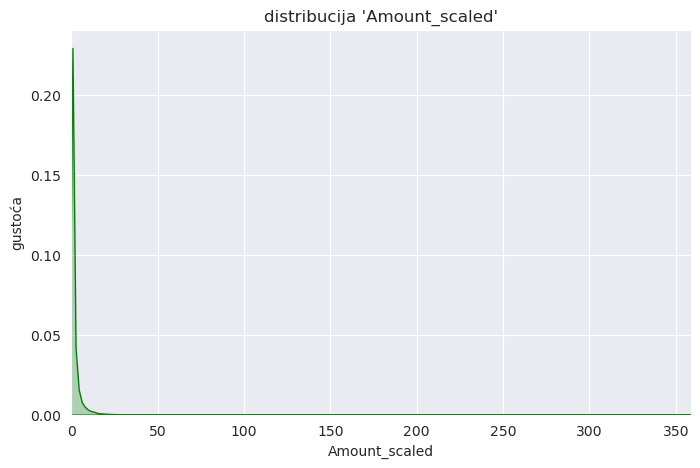

In [12]:
plot_distribution(df, 'Amount_scaled', split_by_class=False)

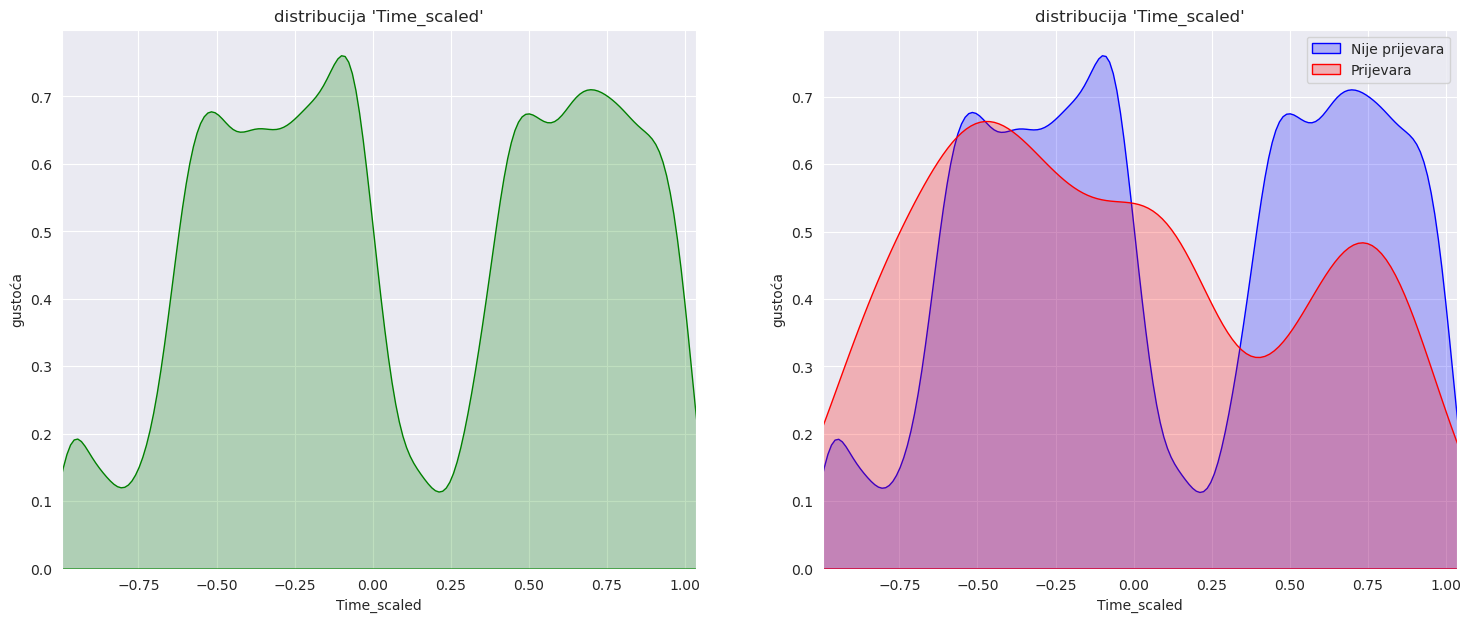

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
plot_distribution(df, 'Time_scaled', split_by_class=False, ax=ax[0])
plot_distribution(df, 'Time_scaled', split_by_class=True, ax=ax[1])

In [14]:
def drop_columns_if_exist(df, columns):
    for column in columns:
        if column in df.columns:
            df.drop(column, axis=1, inplace=True)

In [15]:
drop_columns_if_exist(df, ['Time', 'Amount'])

Nakon skaliranja, stare retke 'Amount' i 'Time' izbacujemo iz podatkovnog skupa.

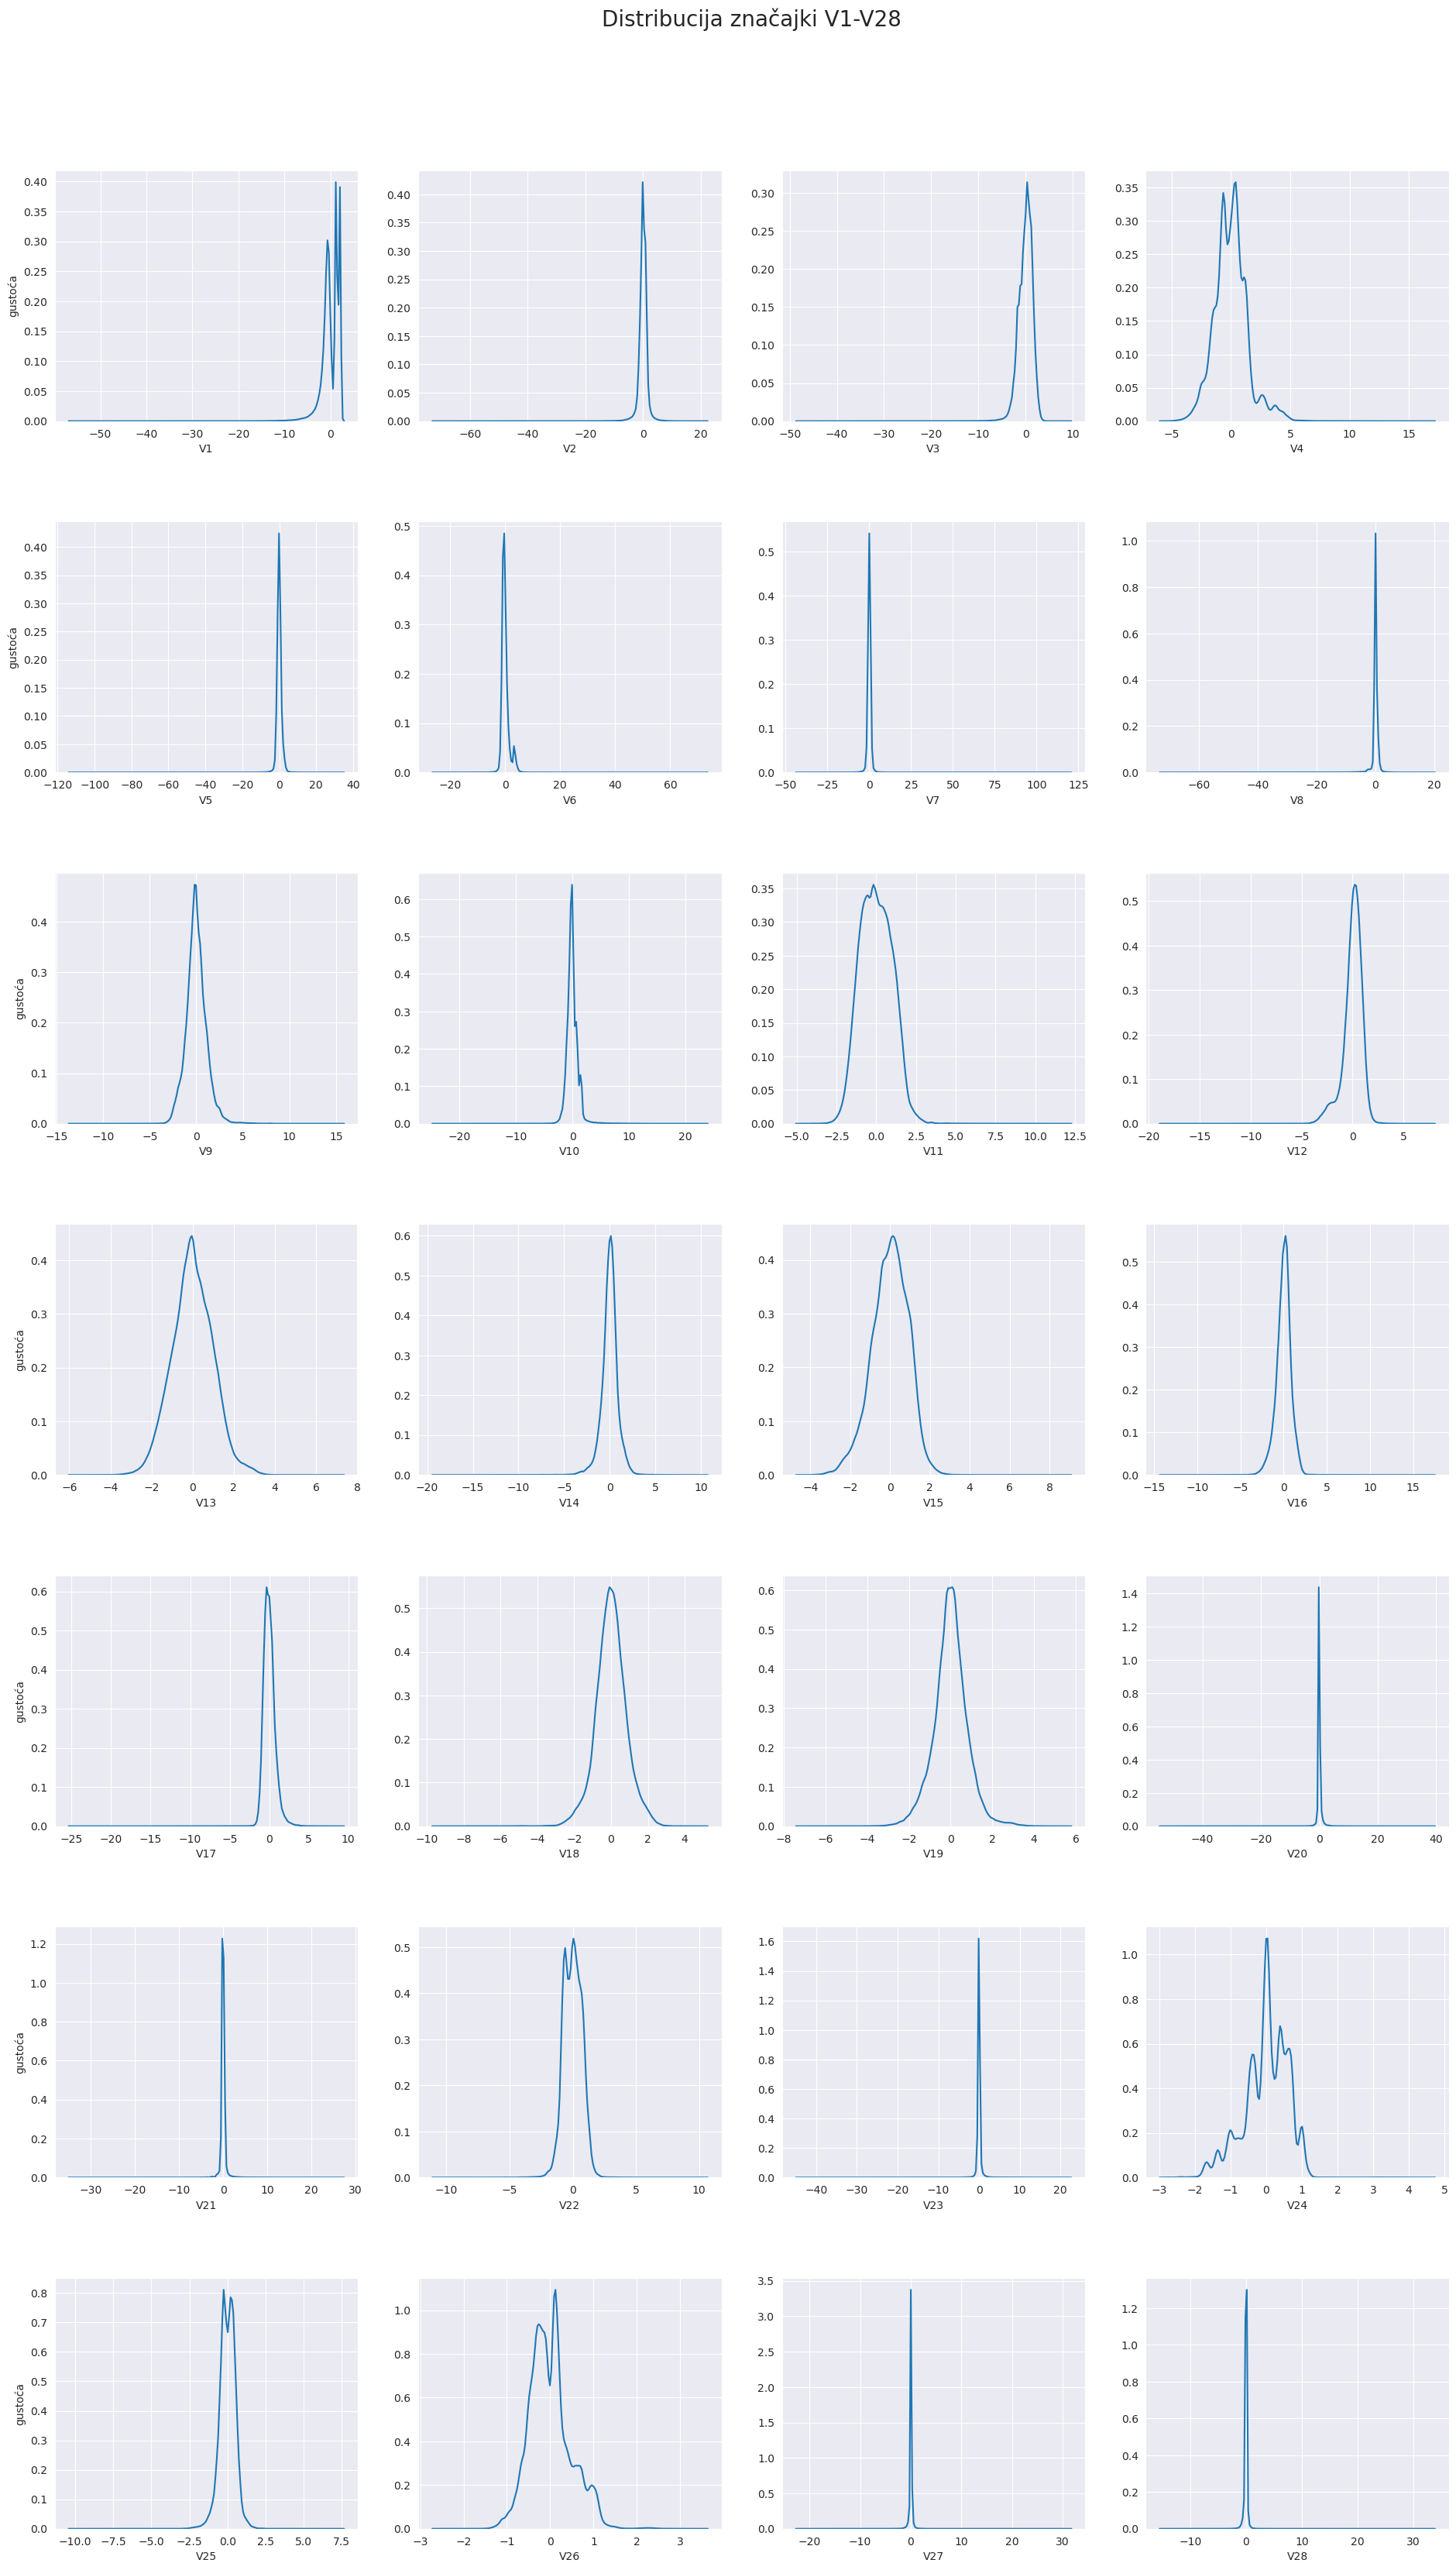

In [16]:
n_rows = 7
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.suptitle('Distribucija značajki V1-V28', fontsize=20)
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.92, wspace=0.2, hspace=0.4)

for row in range(n_rows):
    for col in range(n_cols):
        feature_name = f'V{n_cols*row + col + 1}'
        sns.kdeplot(df[feature_name], ax=ax[row, col])
        if col == 0:
            ax[row, col].set_ylabel('gustoća')
        else:
            ax[row, col].set_ylabel('')
plt.savefig('distribucija_znacajki_V1_V28.png')
plt.show()

((array([-4.57041983, -4.38097388, -4.27824463, ...,  4.27824463,
          4.38097388,  4.57041983]),
  array([-3.07412841e-01, -3.07412841e-01, -3.07412841e-01, ...,
          2.63927898e+02,  2.74359394e+02,  3.58683155e+02])),
 (1.945745962721034, 0.927123862934833, 0.5567134536311753))

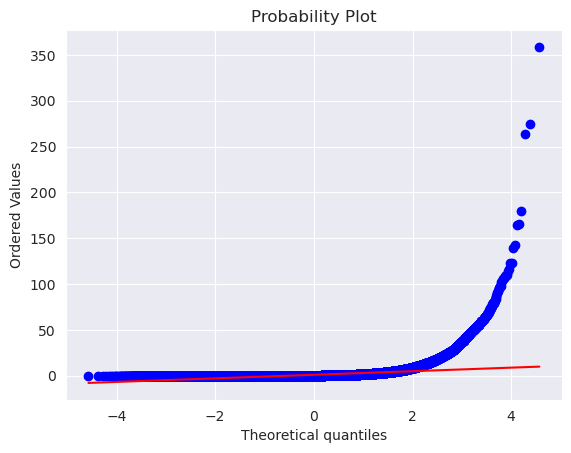

In [17]:
from scipy.stats import shapiro
from scipy.stats import probplot

probplot(df['Amount_scaled'], dist='norm', plot=plt)

#### Correlation matrix

In [18]:
def plot_correlation_heatmap(df, lower_triangular=True, ax=None):
    if ax == None:
        fig, ax = plt.subplots()
    df_corr = df.corr()
    mask = np.triu(np.ones_like(df_corr)) if lower_triangular else np.ones_like(df_corr)
    sns.heatmap(df_corr, xticklabels=True, yticklabels=True, vmin=-1, vmax=1, center=0.0, mask=mask, ax=ax, cmap='coolwarm')
    if ax == None:
        plt.show()

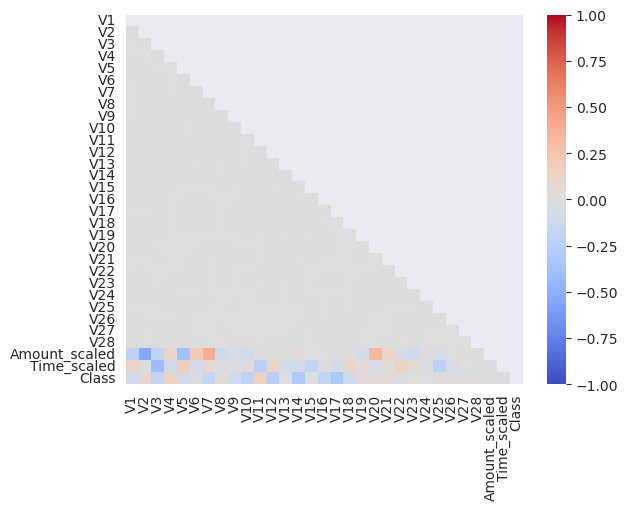

In [19]:
plot_correlation_heatmap(df)


### Uzorkovanje podataka

In [20]:
drop_columns_if_exist(df, ['Amount', 'Time'])

# TODO koristi RandomUnderSampler. Resampling (under/over) must always be done before the train-test split in order to prevent target leak and to prevent getting incorrect(over) estimates of the classification metrics. The author currently has done under sampling before performing the split.

X = df.loc[:, df.columns!='Class']
y = df.loc[:, df.columns=='Class']

non_fraud_idx = np.array(df[df.Class==0].index)
fraud_idx = np.array(df[df.Class==1].index)

# undersample non-fraudelent data
undersampled_non_fraud_idx = np.random.choice(non_fraud_idx, size=len(fraud_idx), replace=False)
all_undersampled_idx = np.concatenate([undersampled_non_fraud_idx, fraud_idx])
df_undersampled = df.iloc[all_undersampled_idx, :]

X_not_in_undersampled = df.iloc[~df.index.isin(all_undersampled_idx), df.columns!='Class']
y_not_in_undersampled = df.iloc[~df.index.isin(all_undersampled_idx), df.columns=='Class']

X_undersampled = df_undersampled.loc[:, df_undersampled.columns!='Class']
y_undersampled = df_undersampled.loc[:, df_undersampled.columns=='Class']

In [21]:
y_not_in_undersampled.sum()

Class    0
dtype: int64

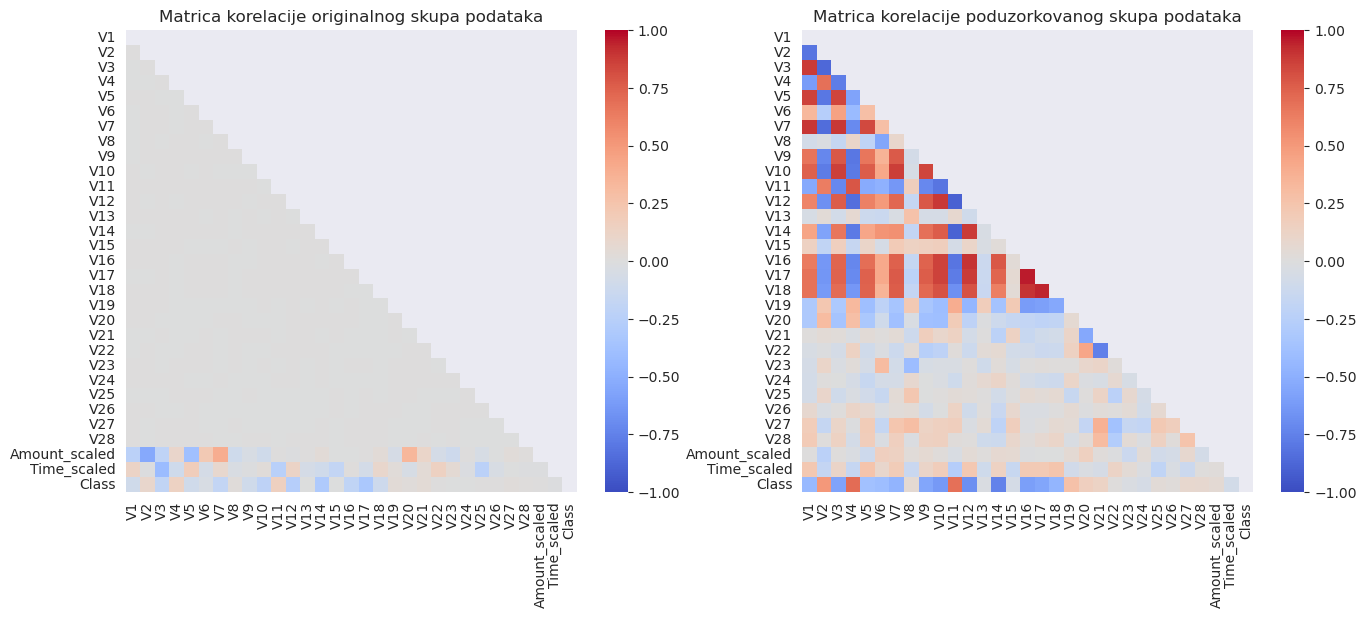

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_correlation_heatmap(df, ax=ax[0])
plot_correlation_heatmap(df_undersampled, ax=ax[1])
ax[0].set_title('Matrica korelacije originalnog skupa podataka')
ax[1].set_title('Matrica korelacije poduzorkovanog skupa podataka')
plt.show()

In [23]:
feature_name = 'V28'
split_by_class = True
#fig, ax = plt.subplots(1, 2, figsize=(18, 7), sharex=True, sharey=True)
plot_distribution(df, feature_name, split_by_class=split_by_class, ax=ax[0])
plot_distribution(df_undersampled, feature_name, split_by_class=split_by_class, ax=ax[1])

<Figure size 640x480 with 0 Axes>

#### Splitting data into train and test set

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer, recall_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.33, random_state=42)

In [25]:
def evaluate_model(model, X_train, X_test, y_train, y_test, eval_func=make_scorer(f1_score, average='macro')):
    # cross-validation on the training set
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=eval_func)
    print(f"fold scores: {[round(x, 3) for x in scores]}")
    print(f"Mean fold score: {scores.mean():.3f}")

    # evaluation on the test set
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print(f"f1_macro: {f1_score(y_test, y_pred, average='macro')}")
    print(f"fbeta: {fbeta_score(y_test, y_pred, beta=10000, average='macro')}")
    print(f"recall:   {recall_score(y_test, y_pred)}")
    return model

In [26]:
model = RandomForestClassifier()
evaluate_model(model, X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled)

fold scores: [0.947, 0.894, 0.924, 0.962, 0.931]
Mean fold score: 0.932
f1_macro: 0.941458651321091
fbeta: 0.9412778366805841
recall:   0.9130434782608695


RandomForestClassifier()

fold scores: [0.947, 0.909, 0.939, 0.97, 0.931]
Mean fold score: 0.939
f1_macro: 0.9444971537001898
fbeta: 0.944269807583697
recall:   0.906832298136646
Area under PR curve: 0.984
fold scores: [0.947, 0.886, 0.924, 0.954, 0.923]
Mean fold score: 0.927
f1_macro: 0.9351858007046467
fbeta: 0.9349530373833786
recall:   0.8881987577639752
Area under PR curve: 0.984


/home/antonio/miniconda3/envs/DUBUCE1_labosi/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/antonio/miniconda3/envs/DUBUCE1_labosi/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

fold scores: [0.932, 0.932, 0.879, 0.97, 0.947]
Mean fold score: 0.932
f1_macro: 0.9322300576281468
fbeta: 0.9320746856454969
recall:   0.906832298136646
Area under PR curve: 0.980


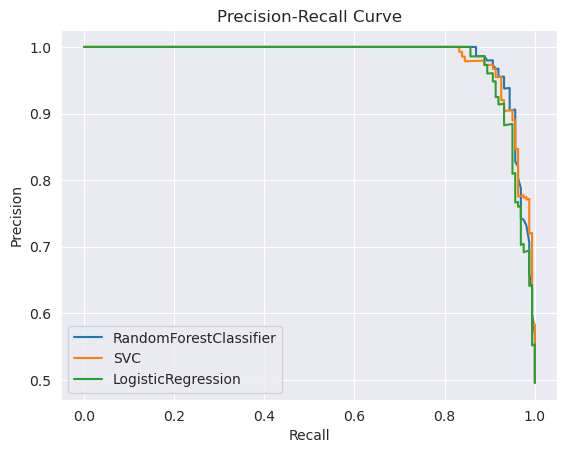

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


def draw_PR_Curve(model, X_train, X_test, y_train, y_test):
    model = evaluate_model(model, X_train, X_test, y_train, y_test)
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)
    print(f'Area under PR curve: {average_precision:.3f}')
    plt.plot(recall, precision, label=type(model).__name__)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')


model = RandomForestClassifier()
model = draw_PR_Curve(model, X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled)
model = SVC(probability=True)
model = draw_PR_Curve(model, X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled)
model = LogisticRegression(C=10000)
model = draw_PR_Curve(model, X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled)
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier()
evaluate_model(model, X_train, X_test, y_train, y_test)

In [ ]:
X = df.loc[:, df.columns!='Class']
y = df.loc[:, df.columns=='Class']

non_fraud_idx = np.array(df[df.Class==0].index)
fraud_idx = np.array(df[df.Class==1].index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
print(y_train.count().values[0], y_train.sum()[0])
print(y_test.count().values[0], y_test.sum()[0])
print(394/227845*100)
print(98/56962*100)

In [ ]:

model = RandomForestClassifier()
evaluate_model(model, X_train_undersampled)